# MUC16 Mutation Trans Effect on Proteomics

This notebook analyzes the trans effect of MUC16 mutation on interacting and other proteins, in Endometrial and Colon cancer.

### Library Imports

In [64]:
import pandas as pd
import numpy as np
import scipy.stats
import collections
import re
import gseapy as gp
from gseapy.plot import barplot, dotplot
import matplotlib.pyplot as plt
import seaborn as sns

import cptac
import cptac.algorithms as al

en = cptac.Endometrial()
co = cptac.Colon()
ov = cptac.Ovarian()

### Investigate KRAS gene

In [65]:
gene = "MUC16"

### Investigate Proteomics, Phosphoproteomics, Acetylproteomics, or Transcriptomics

In [66]:
omics = "proteomics"
#omics = "transcriptomics"
#omics = "phosphoproteomics"
#omics = "acetylproteomics"

# Interacting Proteins: proteomics

## Endometrial

### Generate interacting protein list

In [4]:
'''Use get interacting proteins method to generate list of interacting proteins'''

#comment about how this returns ranked interacting proteins (F/ uniprot or string)
interacting_proteins = al.get_interacting_proteins(gene)

omics_object = en.get_proteomics()

print("Generating interacting protein list")
interacting_proteins_in_omics_df = []

'''Only do comparisons on proteins in the omics dataframe'''
for ip in interacting_proteins:
    if omics == 'phosphoproteomics' or omics == 'acetylproteomics':
        col_regex = ip + "-.*" # Build a regex to get all columns that match the gene
    else:
        col_regex = '^{}$'.format(ip)

    selected = omics_object.filter(regex=col_regex)

    if len(selected.columns) > 0:
        interacting_proteins_in_omics_df.append(ip)

print("Interacting Proteins:")
for interacting_protein in interacting_proteins_in_omics_df:
    print(interacting_protein)

Generating interacting protein list
Interacting Proteins:
ST6GAL1
ST6GALNAC2
C1GALT1C1
ST6GALNAC3
ST3GAL2
MUC16
MSLN
C1GALT1
MUC6
ST3GAL1
MUC5B
MUC1
MUC13
MUC5AC
LGALS1
IGBP1
RAD21
MCM2
EGFR
TRIM25


### Test for significant comparisons in any of interacting proteins

In [6]:
'''Create dataframe in order to do comparisons with wrap_ttest'''
protdf = en.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=interacting_proteins_in_omics_df)
protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']

'''Create the binary valued column needed to do the comparison'''
for ind, row in protdf.iterrows():
    if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
        protdf.at[ind,'Label'] = 'Mutated'
    else:
        protdf.at[ind,'Label'] = 'Wildtype'

'''Format the dataframe correctly'''
protdf = protdf.drop(gene+"_Mutation",axis=1)
protdf = protdf.drop(gene+"_Location",axis=1)
protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
protdf = protdf.drop("Sample_Status",axis=1)

'''Make list of columns to be compared using t-tests'''
col_list = list(protdf.columns)
col_list.remove('Label')

print("Doing t-test comparisons\n")

'''Call wrap_ttest, pass in formatted dataframe'''
wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

'''Print results, if anything significant was found'''
if wrap_results is not None:
        print(wrap_results)
        print("\n\n")

Doing t-test comparisons

No significant comparisons.


## Colon

### Generate interacting protein list

In [7]:
'''Use get interacting proteins method to generate list of interacting proteins'''
interacting_proteins = al.get_interacting_proteins(gene)

omics_object = co.get_proteomics()

print("Generating interacting protein list")
interacting_proteins_in_omics_df = []

'''Only do comparisons on proteins in the omics dataframe'''
for ip in interacting_proteins:
    if omics == 'phosphoproteomics' or omics == 'acetylproteomics':
        col_regex = ip + "-.*" # Build a regex to get all columns that match the gene
    else:
        col_regex = '^{}$'.format(ip)

    selected = omics_object.filter(regex=col_regex)

    if len(selected.columns) > 0:
        interacting_proteins_in_omics_df.append(ip)

print("Interacting Proteins:")
for interacting_protein in interacting_proteins_in_omics_df:
    print(interacting_protein)

Generating interacting protein list
Interacting Proteins:
ST6GAL1
C1GALT1C1
MSLN
C1GALT1
MUC6
MUC4
ST3GAL4
MUC5B
MUC1
MUC13
MUC5AC
LGALS1
IGBP1
RAD21
MCM2
EGFR
TRIM25
KIAA1429


### Test for significant comparisons in any of interacting proteins

In [8]:
'''Create dataframe in order to do comparisons with wrap_ttest'''
protdf = co.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=interacting_proteins_in_omics_df)
protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']

'''Create the binary valued column needed to do the comparison'''
for ind, row in protdf.iterrows():
    if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
        protdf.at[ind,'Label'] = 'Mutated'
    else:
        protdf.at[ind,'Label'] = 'Wildtype'

'''Format the dataframe correctly'''
protdf = protdf.drop(gene+"_Mutation",axis=1)
protdf = protdf.drop(gene+"_Location",axis=1)
protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
protdf = protdf.drop("Sample_Status",axis=1)

'''Make list of columns to be compared using t-tests'''
col_list = list(protdf.columns)
col_list.remove('Label')

print("Doing t-test comparisons\n")

'''Call wrap_ttest, pass in formatted dataframe'''
wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

'''Print results, if anything significant was found'''
if wrap_results is not None:
        print(wrap_results)
        print("\n\n")

Doing t-test comparisons

        Comparison   P_Value
0  MCM2_proteomics  0.000621





## Ovarian

### Generate interacting protein list

In [9]:
'''Use get interacting proteins method to generate list of interacting proteins'''
interacting_proteins = al.get_interacting_proteins(gene)

omics_object = ov.get_proteomics()

print("Generating interacting protein list")
interacting_proteins_in_omics_df = []

'''Only do comparisons on proteins in the omics dataframe'''
for ip in interacting_proteins:
    if omics == 'phosphoproteomics' or omics == 'acetylproteomics':
        col_regex = ip + "-.*" # Build a regex to get all columns that match the gene
    else:
        col_regex = '^{}$'.format(ip)

    selected = omics_object.filter(regex=col_regex)

    if len(selected.columns) > 0:
        interacting_proteins_in_omics_df.append(ip)

print("Interacting Proteins:")
for interacting_protein in interacting_proteins_in_omics_df:
    print(interacting_protein)

Generating interacting protein list
Interacting Proteins:
ST6GAL1
C1GALT1C1
MUC16
MSLN
C1GALT1
MUC4
ST3GAL1
ST3GAL4
MUC5B
MUC1
LGALS1
IGBP1
RAD21
MCM2
EGFR
TRIM25


### Test for significant comparisons in any of interacting proteins

In [39]:
'''Create dataframe in order to do comparisons with wrap_ttest'''
protdf = ov.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=interacting_proteins_in_omics_df)
protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']


'''Create the binary valued column needed to do the comparison'''
for ind, row in protdf.iterrows():
    if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
        protdf.loc[ind,'Label'] = 'Mutated'
    else:
        protdf.loc[ind,'Label'] = 'Wildtype'

'''Format the dataframe correctly'''
protdf = protdf.drop(gene+"_Mutation",axis=1)
protdf = protdf.drop(gene+"_Location",axis=1)
protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
protdf = protdf.drop("Sample_Status",axis=1)
#protdf = protdf.drop_duplicates()
protdf = protdf.loc[:,~protdf.columns.duplicated()]


'''Make list of columns to be compared using t-tests'''
col_list = list(protdf.columns)
col_list.remove('Label')

print("Doing t-test comparisons\n")


'''Call wrap_ttest, pass in formatted dataframe'''
wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

'''Print results, if anything significant was found'''
if wrap_results is not None:
        print(wrap_results)
        print("\n\n")


Doing t-test comparisons

No significant comparisons.


# All Proteins: proteomics

## Endometrial

In [41]:
try:
    print("\nGene: ", gene)

    '''Use all proteins'''
    proteomics = en.get_proteomics()
    all_proteins = proteomics.columns
    #all_proteins = all_proteins[:100]

    '''Create dataframe in order to do comparisons with wrap_ttest'''
    protdf = en.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=all_proteins)
    protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']
    
    '''Create the binary valued column needed to do the comparison'''
    for ind, row in protdf.iterrows():
        if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
            protdf.at[ind,'Label'] = 'Mutated'
        else:
            protdf.at[ind,'Label'] = 'Wildtype'

    '''Format the datafram correctly'''
    protdf = protdf.drop(gene+"_Mutation",axis=1)
    protdf = protdf.drop(gene+"_Location",axis=1)
    protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
    protdf = protdf.drop("Sample_Status",axis=1)

    '''Make list of columns to be compared using t-tests'''
    col_list = list(protdf.columns)
    col_list.remove('Label')

    print("Doing t-test comparisons\n")
    
    '''Call wrap_ttest, pass in formatted dataframe'''
    wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

    '''Print results, if anything significant was found'''
    if wrap_results is not None:
            print(wrap_results)
            print("\n\n")

except Exception as e:
    print("Error in Comparison")
    print(e)


Gene:  MUC16
Doing t-test comparisons



/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


          Comparison   P_Value
0  ZNF362_proteomics  0.000003





## Colon

In [42]:
try:
    print("\nGene: ", gene)
    
    proteomics = co.get_proteomics()
    '''Use all proteins'''
    all_proteins = proteomics.columns
    #all_proteins = all_proteins[:100]

    '''Create dataframe in order to do comparisons with wrap_ttest'''
    protdf = co.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=all_proteins)
    protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']
    
    '''Create the binary valued column needed to do the comparison'''
    for ind, row in protdf.iterrows():
        if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
            protdf.at[ind,'Label'] = 'Mutated'
        else:
            protdf.at[ind,'Label'] = 'Wildtype'

    '''Format the dataframe correctly'''
    protdf = protdf.drop(gene+"_Mutation",axis=1)
    protdf = protdf.drop(gene+"_Location",axis=1)
    protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
    protdf = protdf.drop("Sample_Status",axis=1)

    '''Make list of columns to be compared using t-tests'''
    col_list = list(protdf.columns)
    col_list.remove('Label')

    print("Doing t-test comparisons\n")
    
    '''Call wrap_ttest, pass in formatted dataframe'''
    wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

    '''Print results, if anything significant was found'''
    if wrap_results is not None:
            print(wrap_results)
            print("\n\n")

except Exception as e:
    print("Error in Comparison")
    print(e)


Gene:  MUC16
Doing t-test comparisons



/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


           Comparison   P_Value
0   HSPA4L_proteomics  0.000002
1  CEACAM5_proteomics  0.000003
2   SMCHD1_proteomics  0.000004
3   TRMT2A_proteomics  0.000006





## Ovarian

In [63]:

print("\nGene: ", gene)

'''Get proteomics df'''
proteomics = ov.get_proteomics()

'''Use all proteins'''
all_proteins = proteomics.columns
all_proteins = list(set(all_proteins))

'''Create dataframe in order to do comparisons with wrap_ttest'''
protdf = ov.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=all_proteins)
protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']


'''Create the binary valued column needed to do the comparison'''
for ind, row in protdf.iterrows():
    if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
        protdf.loc[ind,'Label'] = 'Mutated'
    else:
        protdf.loc[ind,'Label'] = 'Wildtype'

'''Format the dataframe correctly'''
protdf = protdf.drop(gene+"_Mutation",axis=1)
protdf = protdf.drop(gene+"_Location",axis=1)
protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
protdf = protdf.drop("Sample_Status",axis=1)
protdf = protdf.loc[:,~protdf.columns.duplicated()]


'''Make list of columns to be compared using t-tests'''
col_list = list(protdf.columns)
col_list.remove('Label')

print("Doing t-test comparisons\n")

'''Call wrap_ttest, pass in formatted dataframe'''
wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

'''Print results, if anything significant was found'''
if wrap_results is not None:
        print(wrap_results)
        print("\n\n")


Gene:  MUC16
Doing t-test comparisons



/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


No significant comparisons.


### Examine MCM2 proteomics accross cancer types

#### Endometrial

P-Value =  0.010098231552779812


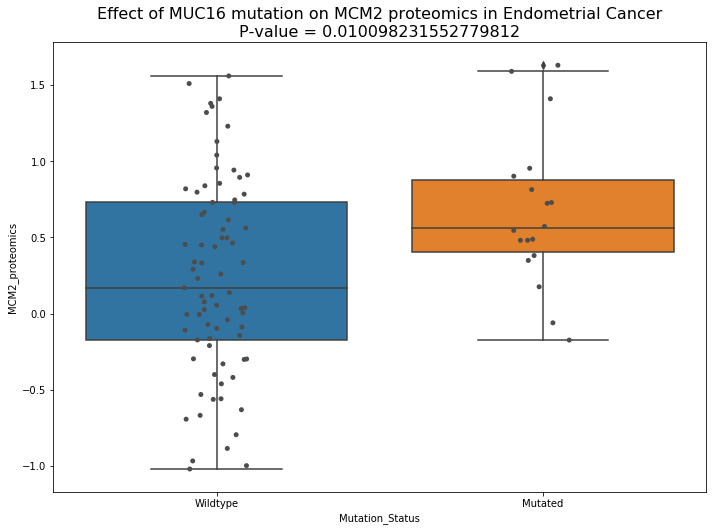

In [67]:
#Endometrial
gene = 'MUC16'
protein = 'MCM2'


protdf = en.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=[protein])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene + "_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene + "_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf[protein + '_proteomics'], wtdf[protein + '_proteomics'])
#print("P-Value = ", pval)

for ind, row in protdf.iterrows():
    if row[gene + '_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = protein + '_proteomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = protein + '_proteomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on " + protein + " proteomics in Endometrial Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()

#### Colon

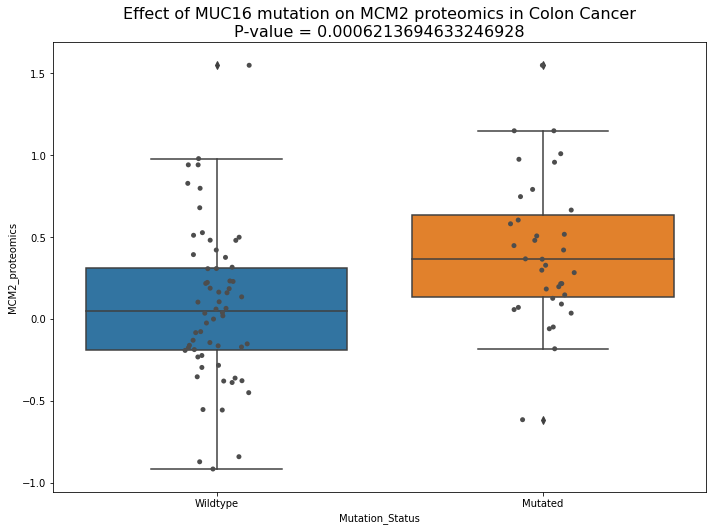

In [68]:
#Endometrial
gene = 'MUC16'
protein = 'MCM2'


protdf = co.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=[protein])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene + "_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene + "_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf[protein + '_proteomics'], wtdf[protein + '_proteomics'])
#print("P-Value = ", pval)

for ind, row in protdf.iterrows():
    if row[gene + '_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = protein + '_proteomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = protein + '_proteomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on " + protein + " proteomics in Colon Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()

#### Ovarian

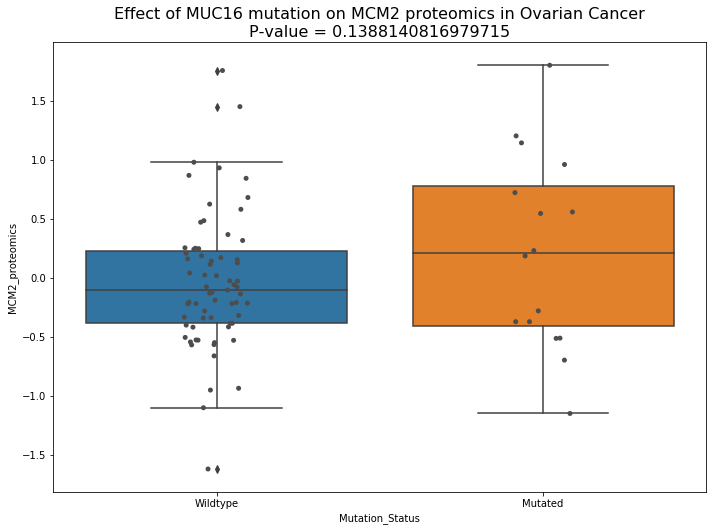

In [69]:
#Endometrial
gene = 'MUC16'
protein = 'MCM2'


protdf = ov.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=[protein])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene + "_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene + "_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf[protein + '_proteomics'], wtdf[protein + '_proteomics'])
#print("P-Value = ", pval)

for ind, row in protdf.iterrows():
    if row[gene + '_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = protein + '_proteomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = protein + '_proteomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on " + protein + " proteomics in Ovarian Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()

## Examine ZNF362 proteomics across cancer types

#### Endometrial

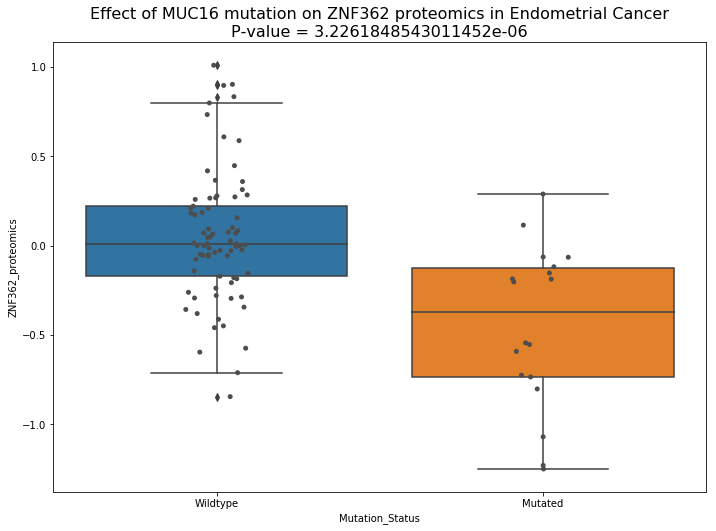

In [70]:
#Endometrial
gene = 'MUC16'
protein = 'ZNF362'


protdf = en.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=[protein])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene + "_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene + "_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf[protein + '_proteomics'], wtdf[protein + '_proteomics'])
#print("P-Value = ", pval)

for ind, row in protdf.iterrows():
    if row[gene + '_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = protein + '_proteomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = protein + '_proteomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on " + protein + " proteomics in Endometrial Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()

#### Colon

ZNF362 proteomic data does not exist currently in Colon Cancer dataset

#### Ovarian

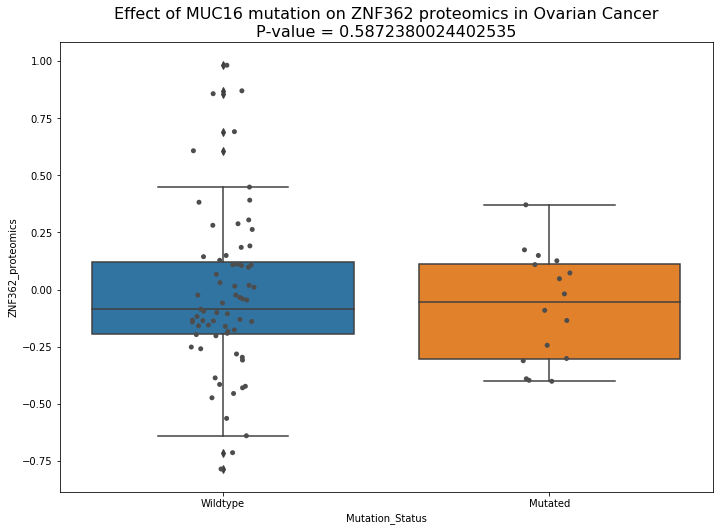

In [74]:
gene = 'MUC16'
protein = 'ZNF362'


protdf = ov.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=[protein])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene + "_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene + "_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf[protein + '_proteomics'], wtdf[protein + '_proteomics'])
#print("P-Value = ", pval)

for ind, row in protdf.iterrows():
    if row[gene + '_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = protein + '_proteomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = protein + '_proteomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on " + protein + " proteomics in Ovarian Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()

### Examine HSPA4L proteomics across cancer types

#### Endometrial

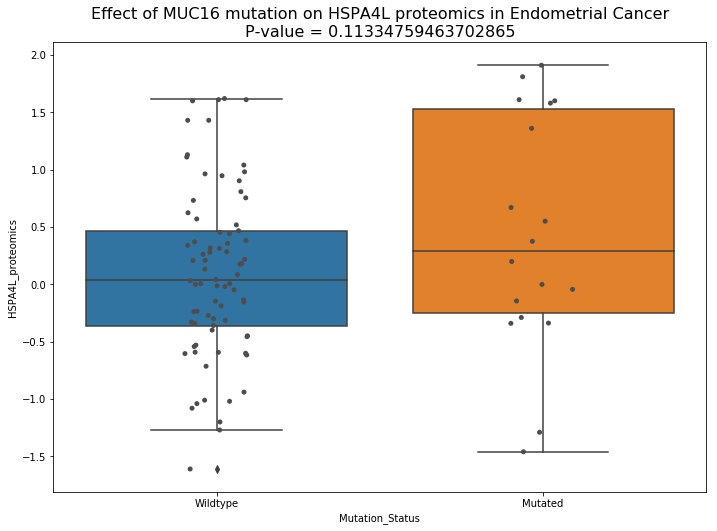

In [76]:
gene = 'MUC16'
protein = 'HSPA4L'


protdf = en.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=[protein])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene + "_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene + "_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf[protein + '_proteomics'], wtdf[protein + '_proteomics'])
#print("P-Value = ", pval)

for ind, row in protdf.iterrows():
    if row[gene + '_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = protein + '_proteomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = protein + '_proteomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on " + protein + " proteomics in Endometrial Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()

#### Colon

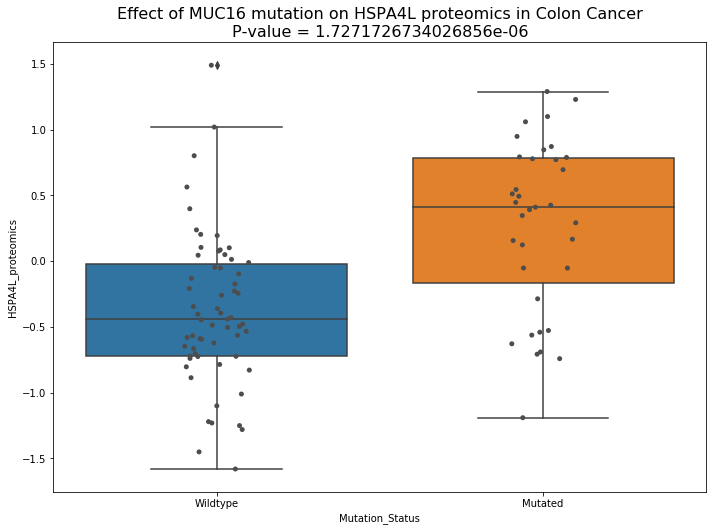

In [78]:
gene = 'MUC16'
protein = 'HSPA4L'


protdf = co.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=[protein])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene + "_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene + "_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf[protein + '_proteomics'], wtdf[protein + '_proteomics'])
#print("P-Value = ", pval)

for ind, row in protdf.iterrows():
    if row[gene + '_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = protein + '_proteomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = protein + '_proteomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on " + protein + " proteomics in Colon Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()

#### Ovarian

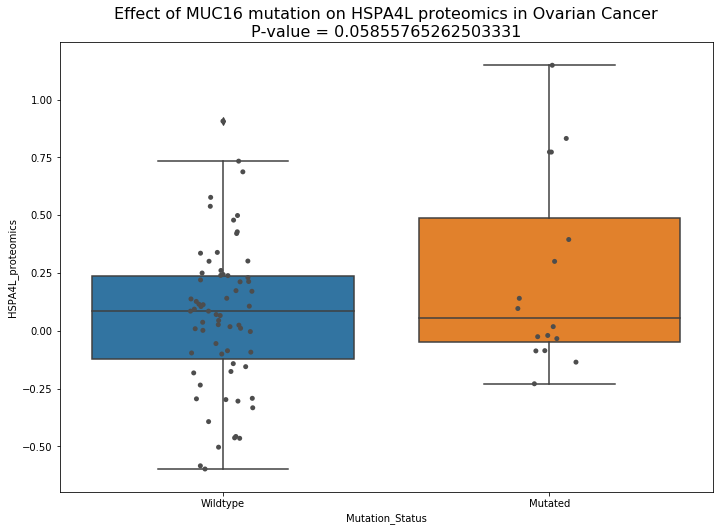

In [79]:
gene = 'MUC16'
protein = 'HSPA4L'

protdf = ov.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=[protein])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene + "_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene + "_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf[protein + '_proteomics'], wtdf[protein + '_proteomics'])
#print("P-Value = ", pval)

for ind, row in protdf.iterrows():
    if row[gene + '_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = protein + '_proteomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = protein + '_proteomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on " + protein + " proteomics in Ovarian Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()

### CEACAM5 proteomics across cancer types

#### Endometrial

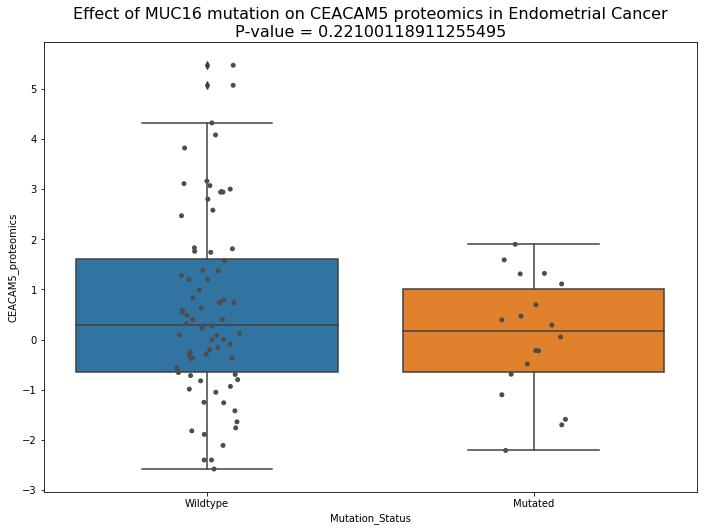

In [81]:
gene = 'MUC16'
protein = 'CEACAM5'

protdf = en.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=[protein])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene + "_Mutation_Status"] != "Wildtype_Tumor"].dropna(axis=0)
wtdf = protdf.loc[protdf[gene + "_Mutation_Status"] == "Wildtype_Tumor"].dropna(axis=0)

stat, pval = scipy.stats.ttest_ind(mutdf[protein + '_proteomics'], wtdf[protein + '_proteomics'])
#print("P-Value = ", pval)

for ind, row in protdf.iterrows():
    if row[gene + '_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = protein + '_proteomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = protein + '_proteomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on " + protein + " proteomics in Endometrial Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()

#### Colon

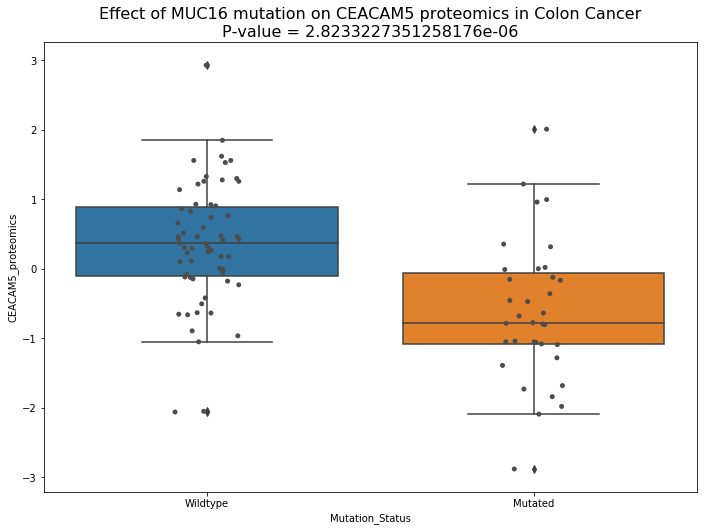

In [82]:
gene = 'MUC16'
protein = 'CEACAM5'

protdf = co.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=[protein])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene + "_Mutation_Status"] != "Wildtype_Tumor"].dropna(axis=0)
wtdf = protdf.loc[protdf[gene + "_Mutation_Status"] == "Wildtype_Tumor"].dropna(axis=0)

stat, pval = scipy.stats.ttest_ind(mutdf[protein + '_proteomics'], wtdf[protein + '_proteomics'])
#print("P-Value = ", pval)

for ind, row in protdf.iterrows():
    if row[gene + '_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = protein + '_proteomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = protein + '_proteomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on " + protein + " proteomics in Colon Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()

#### Ovarian

CEACAM5 proteomic data does not exist in ovarian dataset.

### SMCHD1 proteomics across cancer types

#### Endometrial

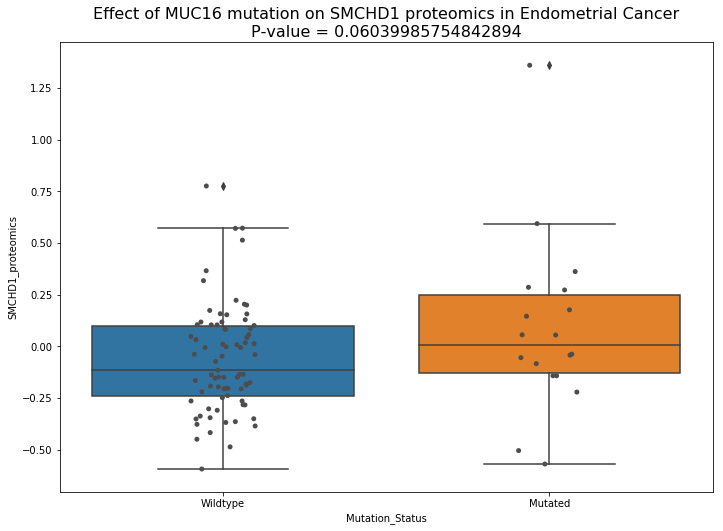

In [84]:
gene = 'MUC16'
protein = 'SMCHD1'

protdf = en.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=[protein])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene + "_Mutation_Status"] != "Wildtype_Tumor"].dropna(axis=0)
wtdf = protdf.loc[protdf[gene + "_Mutation_Status"] == "Wildtype_Tumor"].dropna(axis=0)

stat, pval = scipy.stats.ttest_ind(mutdf[protein + '_proteomics'], wtdf[protein + '_proteomics'])
#print("P-Value = ", pval)

for ind, row in protdf.iterrows():
    if row[gene + '_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = protein + '_proteomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = protein + '_proteomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on " + protein + " proteomics in Endometrial Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()

#### Colon

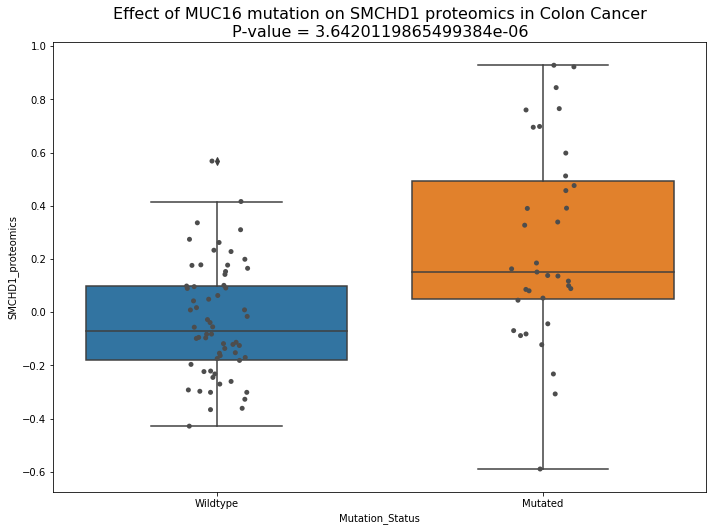

In [91]:
gene = 'MUC16'
protein = 'SMCHD1'

protdf = co.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=[protein])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene + "_Mutation_Status"] != "Wildtype_Tumor"].dropna(axis=0)
wtdf = protdf.loc[protdf[gene + "_Mutation_Status"] == "Wildtype_Tumor"].dropna(axis=0)

stat, pval = scipy.stats.ttest_ind(mutdf[protein + '_proteomics'], wtdf[protein + '_proteomics'])
#print("P-Value = ", pval)

for ind, row in protdf.iterrows():
    if row[gene + '_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = protein + '_proteomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = protein + '_proteomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on " + protein + " proteomics in Colon Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()

#### Ovarian

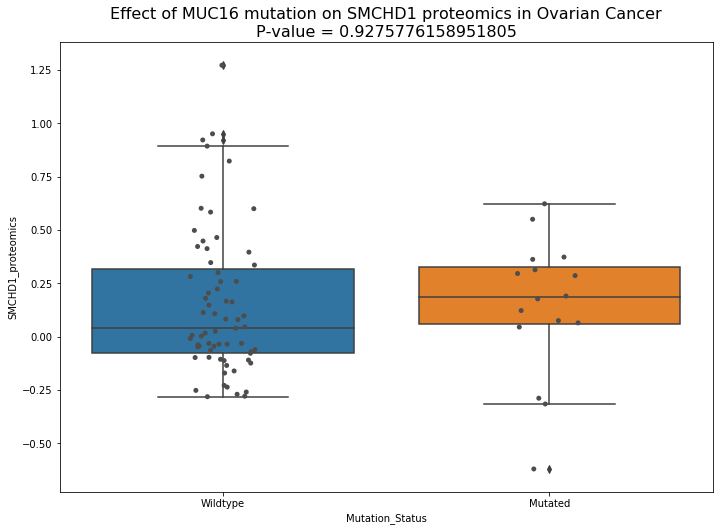

In [92]:
gene = 'MUC16'
protein = 'SMCHD1'

protdf = ov.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=[protein])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene + "_Mutation_Status"] != "Wildtype_Tumor"].dropna(axis=0)
wtdf = protdf.loc[protdf[gene + "_Mutation_Status"] == "Wildtype_Tumor"].dropna(axis=0)

stat, pval = scipy.stats.ttest_ind(mutdf[protein + '_proteomics'], wtdf[protein + '_proteomics'])
#print("P-Value = ", pval)

for ind, row in protdf.iterrows():
    if row[gene + '_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = protein + '_proteomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = protein + '_proteomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on " + protein + " proteomics in Ovarian Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()

### TRMT2A proteomics across cancer types

#### Endometrial

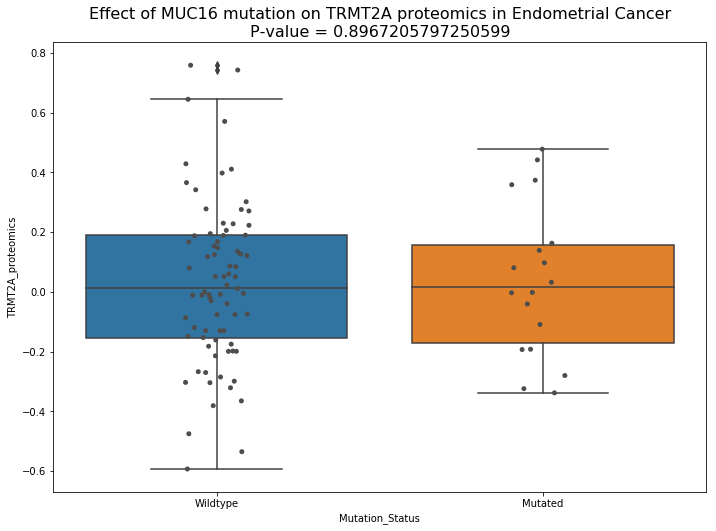

In [87]:
gene = 'MUC16'
protein = 'TRMT2A'

protdf = en.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=[protein])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene + "_Mutation_Status"] != "Wildtype_Tumor"].dropna(axis=0)
wtdf = protdf.loc[protdf[gene + "_Mutation_Status"] == "Wildtype_Tumor"].dropna(axis=0)

stat, pval = scipy.stats.ttest_ind(mutdf[protein + '_proteomics'], wtdf[protein + '_proteomics'])
#print("P-Value = ", pval)

for ind, row in protdf.iterrows():
    if row[gene + '_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = protein + '_proteomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = protein + '_proteomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on " + protein + " proteomics in Endometrial Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()

#### Colon

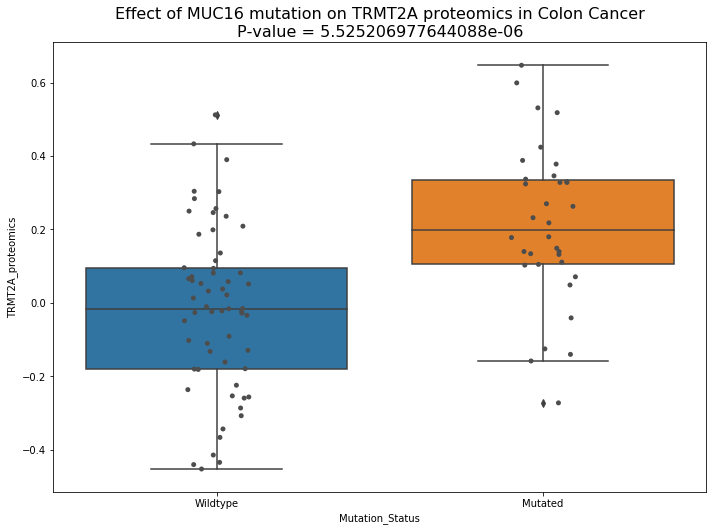

In [89]:
gene = 'MUC16'
protein = 'TRMT2A'

protdf = co.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=[protein])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene + "_Mutation_Status"] != "Wildtype_Tumor"].dropna(axis=0)
wtdf = protdf.loc[protdf[gene + "_Mutation_Status"] == "Wildtype_Tumor"].dropna(axis=0)

stat, pval = scipy.stats.ttest_ind(mutdf[protein + '_proteomics'], wtdf[protein + '_proteomics'])
#print("P-Value = ", pval)

for ind, row in protdf.iterrows():
    if row[gene + '_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = protein + '_proteomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = protein + '_proteomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on " + protein + " proteomics in Colon Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()

#### Ovarian

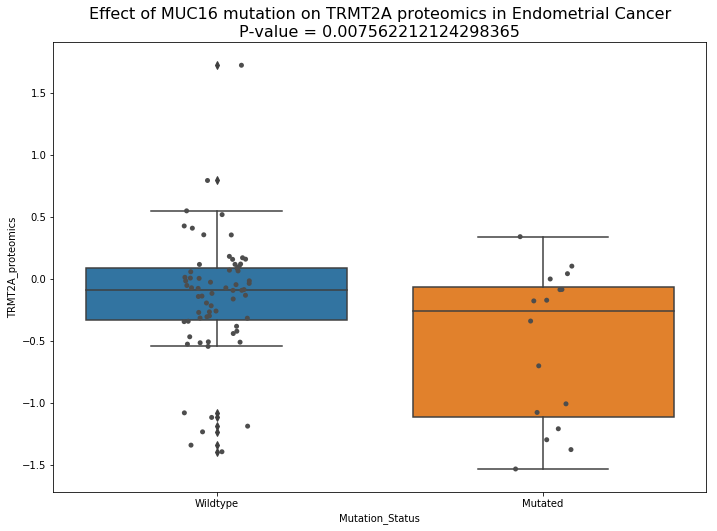

In [90]:
gene = 'MUC16'
protein = 'TRMT2A'

protdf = ov.join_omics_to_mutations(mutations_genes=[gene], omics_df_name=omics, omics_genes=[protein])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene + "_Mutation_Status"] != "Wildtype_Tumor"].dropna(axis=0)
wtdf = protdf.loc[protdf[gene + "_Mutation_Status"] == "Wildtype_Tumor"].dropna(axis=0)

stat, pval = scipy.stats.ttest_ind(mutdf[protein + '_proteomics'], wtdf[protein + '_proteomics'])
#print("P-Value = ", pval)

for ind, row in protdf.iterrows():
    if row[gene + '_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = protein + '_proteomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = protein + '_proteomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on " + protein + " proteomics in Endometrial Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()

## Conclusions

MCM2 showed significantly altered proteomic levels when MUC16 was mutated in Colon Cancer. It was recognized as an interacting partner to MUC16. ZNF362 showed significantly altered proteomic levels when MUC16 was mutated in Endometrial Cancer. It was recognized as an interacting partner to MUC16. HSPA4L, CEACAM5, SMCHD1, and TRMT2A all showed significantly altered proteomic levels when MUC16 was mutated.